In [ ]:
from keras.datasets import imdb

In [ ]:
import numpy as np

In [ ]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_labels

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
len(word_index)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
reverse_word_index

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
# Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

In [ ]:
x_train = vectorize_sequences(train_data)

In [ ]:
x_train.ndim

In [ ]:
x_train.shape

In [ ]:
x_test = vectorize_sequences(test_data)

In [ ]:
x_test.shape

In [ ]:
x_test.ndim

In [ ]:
y_train = np.asarray(train_labels).astype('float32')

In [ ]:
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models

In [ ]:
from keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

In [ ]:
import matplotlib.pyplot as pt

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs=range(1, len(loss_values) + 1)

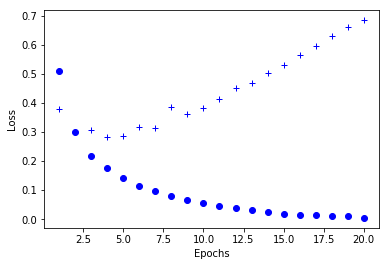

In [33]:
#bo is for blue dot
pt.plot(epochs, loss_values, 'bo')
#b+ is for blue crosses
pt.plot(epochs, val_loss_values, 'b+')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.show()

In [34]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 80s 3ms/step


In [35]:
results

[0.7515113937592507, 0.85036]

In [36]:
model.predict(x_test)

array([[0.00929334],
       [0.9999999 ],
       [0.9054983 ],
       ...,
       [0.00331072],
       [0.01523173],
       [0.70113224]], dtype=float32)